In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,fbeta_0.50,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95
0,1,0.000001,0.840698,0.861873,0.208769,0.179972,0.138725,0.094137,0.057228,0.032614,0.017759,0.009189,0.004546,0.002099,0.000906,0.000383,0.000135,0.000050,0.000013,0.000002
1,2,0.000011,0.816007,0.792289,0.235975,0.230889,0.220114,0.202714,0.177798,0.145834,0.109715,0.074579,0.045815,0.025615,0.013161,0.006099,0.002498,0.000829,0.000194,0.000022
2,3,0.000021,0.782880,0.764584,0.241162,0.241099,0.237806,0.230998,0.220345,0.205457,0.184939,0.158151,0.125605,0.089761,0.056201,0.030026,0.013080,0.004239,0.000925,0.000078
3,4,0.000031,0.757783,0.723525,0.245285,0.246029,0.246272,0.245487,0.243162,0.239448,0.234029,0.226154,0.214546,0.197554,0.173078,0.137734,0.089107,0.037598,0.006967,0.000278
4,5,0.000041,0.727518,0.679474,0.248847,0.249183,0.249891,0.253463,0.265775,0.284947,0.289917,0.291316,0.292037,0.292220,0.291213,0.287866,0.278366,0.249223,0.158415,0.015628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,0.000100,0.531498,0.672848,0.294208,0.294190,0.294170,0.294156,0.294143,0.294133,0.294118,0.294102,0.294093,0.294079,0.294051,0.294047,0.294034,0.294014,0.294010,0.294004
85,86,0.000100,0.499725,0.688561,0.354097,0.354106,0.354105,0.354113,0.354112,0.354124,0.354130,0.354138,0.354142,0.354142,0.354144,0.354148,0.354154,0.354164,0.354185,0.354228
86,87,0.000100,0.516382,0.621871,0.293318,0.293365,0.293402,0.293436,0.293475,0.293513,0.293548,0.293584,0.293617,0.293657,0.293699,0.293749,0.293813,0.293896,0.294020,0.294223
87,88,0.000100,0.511899,0.566401,0.354828,0.354919,0.355001,0.355075,0.355153,0.355222,0.355280,0.355348,0.355415,0.355486,0.355570,0.355664,0.355768,0.355904,0.356099,0.356427


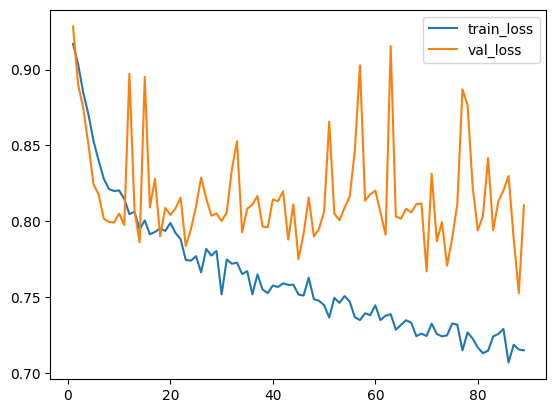

In [2]:
plt.plot(df["epoch"], np.sqrt(df["loss_train"]), label="train_loss")
plt.plot(df["epoch"], np.sqrt(df["loss_val"]), label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(89, 16)


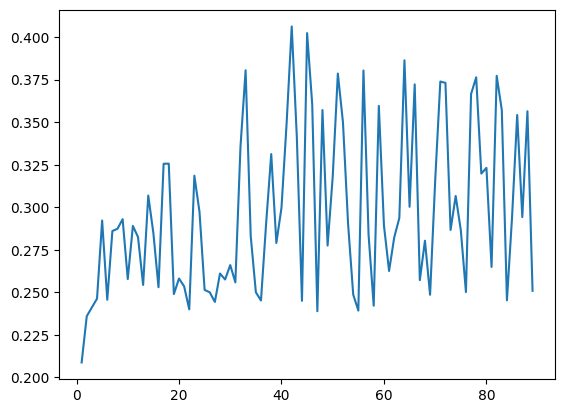

In [3]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

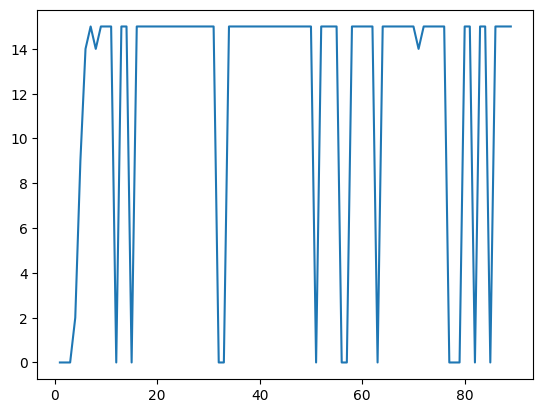

In [4]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")